In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

unique_mice = merged_data["Mouse ID"].nunique()

unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'])]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = merged_data.loc[merged_data['Mouse ID'] == "g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[merged_data['Mouse ID'] != "g989"]
cleaned_df

#not dropping duplicates for this question
#cleaned_df = merged_data.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = "last", inplace = False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = cleaned_df["Mouse ID"].nunique()

unique_mice2

248

In [ ]:
#SUMMARY STATS

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
use_df = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]
grouped_df = use_df.groupby("Drug Regimen")

mean_df = grouped_df.mean()
median_df = grouped_df.median()
variance_df = grouped_df.var()
stdev_df = grouped_df.std()
sem_df = grouped_df.sem()

mean_median = pd.DataFrame.merge(mean_df, median_df, on="Drug Regimen")
variance_stdev = pd.DataFrame.merge(variance_df, stdev_df, on="Drug Regimen")
almost_all = pd.DataFrame.merge(mean_median, variance_stdev, on="Drug Regimen")
almost_all = almost_all.rename(columns={"Tumor Volume (mm3)_x_x":"Mean","Tumor Volume (mm3)_y_x":"Median","Tumor Volume (mm3)_x_y":"Variance","Tumor Volume (mm3)_y_y":"St. Dev."})

complete_df = pd.DataFrame.merge(almost_all, sem_df, on="Drug Regimen")
complete_df = complete_df.rename(columns={"Tumor Volume (mm3)":"SEM"})
                                        
complete_df
# Assemble the resulting series into a single summary dataframe.

,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

agg = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"]).reset_index()
# Using the aggregation method, produce the same summary statistics in a single line
agg

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
#BAR AND PIE CHARTS

<AxesSubplot:xlabel='Drug Regimen'>

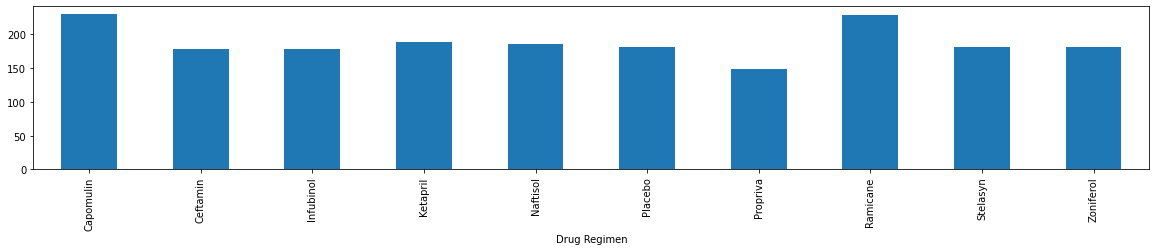

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#unique_df = cleaned_df.drop_duplicates(subset = ["Mouse ID","Drug Regimen"], keep = "first", inplace = False)
bar_df = cleaned_df.groupby("Drug Regimen").count()
bar_df= bar_df["Mouse ID"]

bar_df.plot(kind="bar", figsize=(20,3))

([<matplotlib.axis.XTick at 0x7fc548908a00>,
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

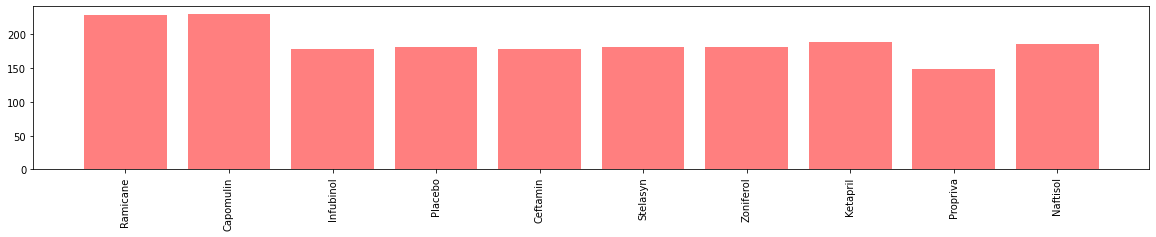

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#unique1_df = cleaned_df.drop_duplicates(subset = ["Mouse ID","Drug Regimen"], keep = "first", inplace = False)

drugs = cleaned_df["Drug Regimen"].unique()

unique1_df = cleaned_df["Drug Regimen"]

count = 0 
values = []

for drug in drugs:
    for row in unique1_df:
        if row == drug:
            count = count + 1
    values.append(count)
    count = 0

#x-axis: drugs // y_axis = values

x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, values, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")



array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

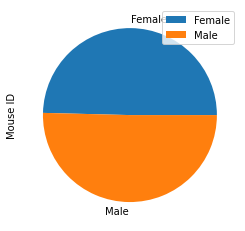

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique1_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "first", inplace = False)

pie_df = unique1_df[["Sex", "Mouse ID"]].groupby("Sex").count()

pie_df.plot(kind="pie", subplots=True)

([<matplotlib.patches.Wedge at 0x7fc548576eb0>,
 [Text(-0.6963355017006471, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.37981936456398924, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

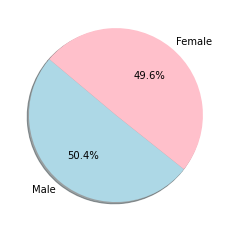

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
unique1_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "first", inplace = False)
# did not have to drop
genders = unique1_df["Sex"].unique()

unique1_df = unique_df["Sex"]

count = 0 
values = []

for gender in genders:
    for row in unique1_df:
        if row == gender:
            count = count + 1
    values.append(count)
    count = 0

colors = ["lightblue","pink"]
plt.pie(values, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [33]:
#QUARTILES, OUTLIERS, AND BOXPLOTS
last_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "last", inplace = False)

last_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_df = cleaned_df.drop_duplicates(subset = ["Mouse ID"], keep = "last", inplace = False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = last_df[(last_df["Drug Regimen"] == "Capomulin") | (last_df["Drug Regimen"] == "Ramicane") | (last_df["Drug Regimen"] == "Infubinol") |  (last_df["Drug Regimen"] == "Ceftamin")]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
# put list of four regimens into a list
drugs = last_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
#create an empty list
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#start for loop through four regimens
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last = last_df.loc[last_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    tumor_vol.append(last)
    
    
    # add subset 
    
    #take series from above and append to empty list
    
    # Determine outliers using upper and lower bounds
    quartiles = last.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(drug)
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-------------------------------------------------------")
    #outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
    #outlier_occupancy

Ramicane
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------
Capomulin
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------
Infubinol
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 coul

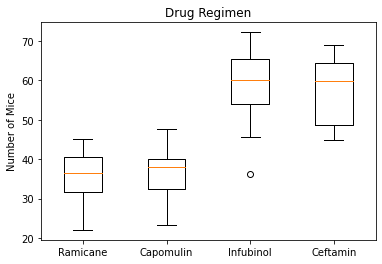

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Number of Mice')
ax1.boxplot(tumor_vol,labels=drugs)
plt.show()

In [ ]:
#LINE AND SCATTER PLOTS

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



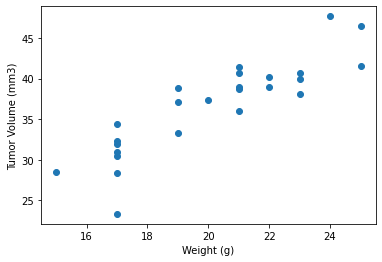

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_df = last_df[last_df["Drug Regimen"] == "Capomulin"]

cor_df = drug_df.groupby("Mouse ID").mean()

x_values = cor_df['Weight (g)']
y_values = cor_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
#CORRELATION AND REGRESSION

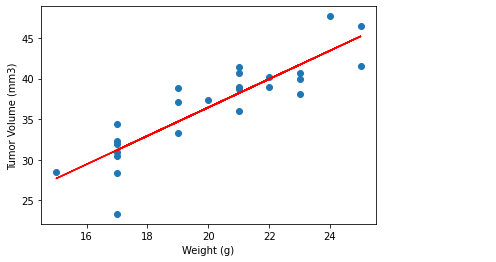

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
drug_df = last_df[last_df["Drug Regimen"] == "Capomulin"]

cor_df = drug_df.groupby("Mouse ID").mean()

x_values = cor_df['Weight (g)']
y_values = cor_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,22),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()